In [23]:
import pandas as pd
from sqlalchemy import create_engine
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

<h3>Store CSV into DataFrame</h3>

In [24]:
csv_file = "arrest_data.csv"
arrest_data_df = pd.read_csv(csv_file)
arrest_data_df.head()

,DATE,TEAM,NAME,POSITION,CASE,CATEGORY,DESCRIPTION,OUTCOME
0,3/27/2017,SEA,Trevone Boykin,QB,Arrested,Drugs,"Accused of marijuana possession, public intoxi...",Resolution undetermined.
1,3/26/2017,CHI,Deiondre Hall,CB,Arrested,Disorderly conduct,"Accused of disorderly conduct, public intoxica...",Resolution undetermined.
2,3/26/2017,GB,Makinton Dorleant,CB,Arrested,Police interference,Accused of interfence after scuffle outside of...,Resolution undetermined.
3,3/7/2017,KC,Demetrius Harris,TE,Arrested,Drugs,Suspected of felony marijuana possession as pa...,Resolution undetermined.
4,3/5/2017,LAR,Ethan Westbrooks,DT,Arrested,Domestic violence,Suspected of domestic violence in Sacramento a...,Resolution undetermined.


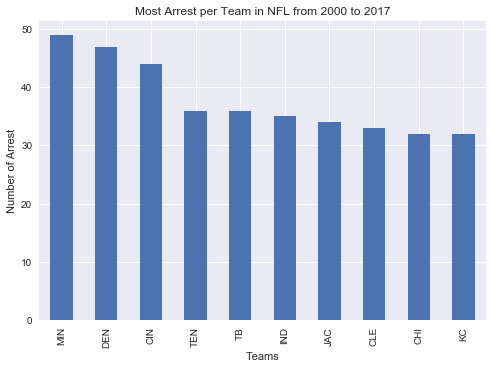

In [25]:
# Plot Teams with Most common cases (iteam_arrests = arrest_data_df["TEAM"].value_counts()e arrest)
team_arrests = arrest_data_df["TEAM"].value_counts()
#print(team_arrests.head(10))  

team_arrests.head(10).plot.bar(arrest_data_df["TEAM"].value_counts())
plt.title('Most Arrest per Team in NFL from 2000 to 2017')
plt.ylabel('Number of Arrest')
plt.xlabel('Teams')
plt.savefig('Most_arrest.PNG')

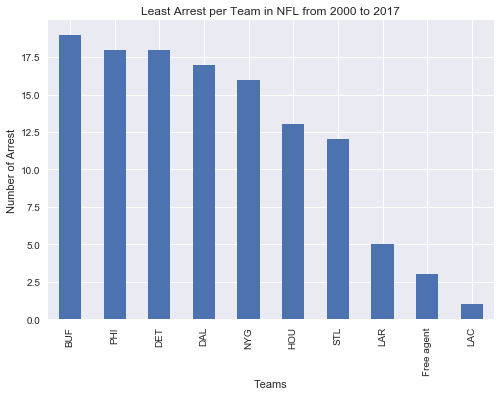

In [26]:
# Plot Teams with the least common cases (ie arrest)
team_arrests = arrest_data_df["TEAM"].value_counts()
#print(team_arrests.tail(10))  

team_arrests.tail(10).plot.bar(arrest_data_df["TEAM"].value_counts())
plt.title('Least Arrest per Team in NFL from 2000 to 2017')
plt.ylabel('Number of Arrest')
plt.xlabel('Teams')
plt.savefig('Least_arrest.PNG')

<h3>Create new data with select columns</h3>

In [ ]:
# Create a filtered dataframe from specific columns
new_arrest_data_df = arrest_data_df[['NAME', 'DATE', 'CATEGORY', 'DESCRIPTION']].copy()

# Rename the column headers
new_arrest_data_df = new_arrest_data_df.rename(columns={"NAME": "player_name",
                                                          "DATE": "date_of_arrest",
                                                          "CATEGORY": "category",
                                                          "DESCRIPTION": "description"})

new_arrest_data_df.dropna(inplace=True)

# Set index
new_arrest_data_df.set_index("date_of_arrest", inplace=True)

new_arrest_data_df.head()

<h3>Store JSON data into a DataFrame</h3>

In [ ]:
json_file = "profiles.json"
player_profile_df = pd.read_json(json_file)
player_profile_df.head(20)

<h3>Clean DataFrame</h3>

In [ ]:
# Create a filtered dataframe from specific columns
new_player_profile_df = player_profile_df[["player_id","name", "current_team", "position"]].copy()

# Rename the column headers
new_player_profile_df = new_player_profile_df.rename(columns={"player_id": "id",
                                                              "name": "player_name",
                                                              "current_team": "team"})

new_player_profile_df.dropna(inplace=True)

# Set index
new_player_profile_df.set_index("id", inplace=True)
                                                          
new_player_profile_df.head()

<h3>Connect to local database</h3>

In [ ]:
rds_connection_string = "postgres:1234@localhost:5432/nfl_arrest_db"
engine = create_engine(f'postgresql://{rds_connection_string}')

<h3>Check for tables</h3>

In [ ]:
engine.table_names()

<h3>Use pandas to load csv converted DataFrame into database</h3>

In [ ]:
new_arrest_data_df.to_sql(name='arrest_table', con=engine, if_exists='append', index=False)

<h3>Use pandas to load json converted DataFrame into database</h3>

In [ ]:
new_player_profile_df.to_sql(name='player_profile', con=engine, if_exists='append', index=False)

<h3>Confirm data has been added by querying the arrest_table</h3>

In [ ]:
pd.read_sql_query('select * from arrest_table', con=engine).head()

<h3>Confirm data has been added by querying the player_profile</h3>

In [ ]:
pd.read_sql_query('select * from player_profile', con=engine).head()

<h3>Joining both datasets into 1 dataset</h3>

In [ ]:
combined_ds = new_arrest_data_df.merge(new_player_profile_df,left_on='player_name', right_on='player_name')

In [ ]:
#combined_ds.head()
combined_ds

<h3>Use pandas to load csv converted DataFrame into database</h3>

In [ ]:
combined_ds.to_sql(name='combine_table', con=engine, if_exists='append', index=False)

<h3>Confirm data has been added by querying the player_profile</h3>

In [ ]:
pd.read_sql_query('select * from combine_table', con=engine).head(30)